<p> The point of this notebook is to make waterfall plots of the raw data from the IDR2.1 cross polarization files. 

In [1]:
%matplotlib notebook

from pyuvdata import UVData, UVCal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [6]:
#Create 2 uv elements to call the xy and yx data
uvx = UVData()
uvy = UVData()

#Read in a given time
uvx.read_uvfits('xy_time_split_data/zen.grp1.of1.xy.LST.52071.uvOCRSL.uvfits') 
datax = uvx.get_data(11,12)
uvy.read_uvfits('yx_time_split_data/zen.grp1.of1.yx.LST.52071.uvOCRSL.uvfits')
datay = uvy.get_data(11,12)


<IPython.core.display.Javascript object>


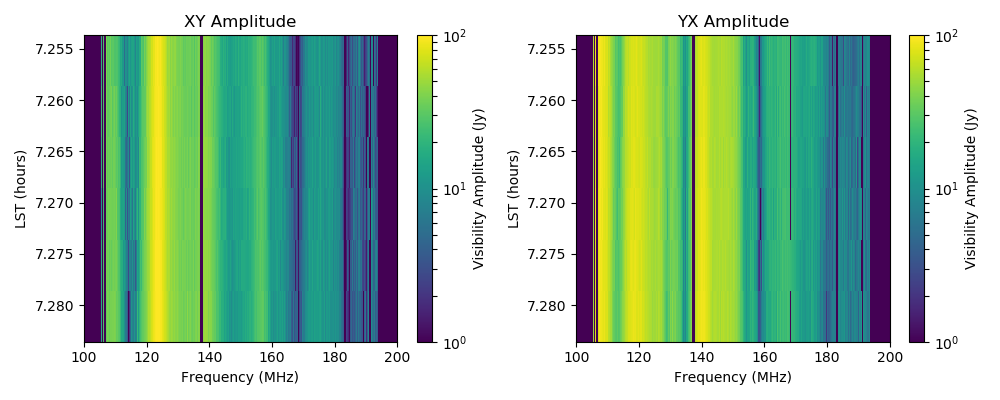

In [7]:
#Plot the two images side by side with the same color bar
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.imshow(np.abs(datax), aspect='auto', norm=matplotlib.colors.LogNorm(1e0,1e2),
          extent=(np.min(uvx.freq_array[0])/1e6,np.max(uvx.freq_array[0])/1e6,
                  np.max(np.unique(uvx.lst_array))*12/np.pi,np.min(np.unique(uvx.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('XY Amplitude')

plt.subplot(122)
plt.imshow(np.abs(datay), aspect='auto', norm=matplotlib.colors.LogNorm(1e0,1e2),
          extent=(np.min(uvy.freq_array[0])/1e6,np.max(uvy.freq_array[0])/1e6,
                  np.max(np.unique(uvy.lst_array))*12/np.pi,np.min(np.unique(uvy.lst_array))*12/np.pi))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('YX Amplitude')

plt.tight_layout();